This code is designed to import and display the GLM data

In [1]:
#import resources

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import cartopy.feature as cfeature
import cartopy.mpl as cmpl

In [2]:
#import netCDF file
nc_file = nc.Dataset('../../../localdata/cases/20180519/GLM_data/GLM-00-00_20180520_040000_60_1src_056urad-dx_flash_extent.nc','r')

In [9]:
time = nc_file.variables['time']
dtime = nc.num2date(time[:],time.units)
print (dtime)

[datetime.datetime(2018, 5, 20, 4, 0)]


In [5]:
#makes the variable from the netCDF file into a local variable that we can use when plotting data
GLM_var = nc_file.variables['flash_extent_density'][:,:]
GLM_var = np.squeeze(GLM_var)

x = nc_file.variables['x'][:] 
y = nc_file.variables['y'][:]

GLM_var[x==x[1850],:] = 1000
GLM_var[x==x[1600],:] = 1000

GLM_var[:,y==y[810]] = 1000
GLM_var[:,y==y[740]] = 1000
GLM_var[GLM_var==0] = np.nan

In [7]:
x_locs = np.arange(1600,1851,1)
y_locs = np.arange(740,811,1)

GLM_iso_var = np.ones((len(x),len(y)))*np.nan

for i in x_locs:
    for j in y_locs:
        GLM_iso_var[i,j] = GLM_var[i,j]

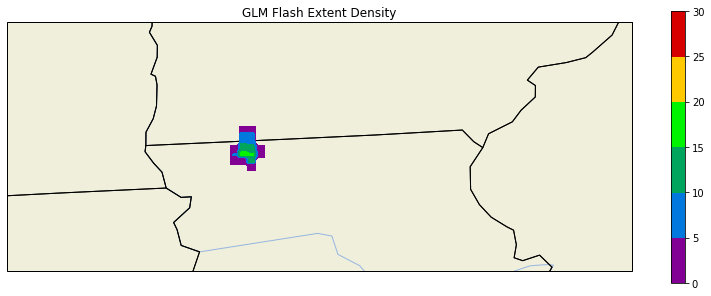

In [8]:
bounds = np.arange(0, 35, 5)

#creating plot with all the features
plt.figure(figsize=(14, 5))
ax = plt.axes(projection=ccrs.Geostationary(-75, 35786023.0))
#ax.set_extent([-87, -80, 25, 32]) #FLORIDA
#ax.set_extent([-138, -60, 24, 55]) #CONUS
ax.set_extent([-97, -90, 39, 42]) #MIZZOURI
plt.contourf(x * 35786023.0, y * 35786023.0, GLM_iso_var.T, levels=bounds, cmap=plt.get_cmap('nipy_spectral'), zorder=10)
plt.title('GLM Flash Extent Density')
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES, zorder=8)
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

we = plt.colorbar()
#plt.savefig("Average_flash_area", orientation="landscape", format="ps")
